In [1]:
import pandas as pd
import pickle as pk
import utils.metrics as utils_metrics
import utils.data_processing as dp
import utils.models as models

Using TensorFlow backend.
/home/apps/software/Tensorflow-GPU/1.2.1-IGB-gcc-4.9.4-Python-3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/apps/software/Tensorflow-GPU/1.2.1-IGB-gcc-4.9.4-Python-3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/apps/software/Tensorflow-GPU/1.2.1-IGB-gcc-4.9.4-Python-3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as

In [2]:
df_positive = pd.read_csv('positive.csv')

In [3]:
df_negative = pd.read_csv('negative.csv')

In [4]:
class_epoch_dict = {
    2: 250,
    3: 180,
    4: 140,
    5: 120
}

In [5]:
n_classes = 5
neg_sample_rate = 0.5
n_epoch = class_epoch_dict[n_classes]
train_ratio = 0.8
class_balance = 'oversample'

In [6]:
df_positive_top_n = dp.top_n_classes(df_positive, n_classes)
df_negative_train = df_negative[:100000]
df_negative_test = df_negative[100000:110000]
data_dict = dp.split_train_neg(df_positive_top_n, train_ratio, 0, df_negative_train, df_negative_test, neg_sample_rate, True, True, class_balance)
network_dict = models.make_full_network_neg(None)

In [7]:
train_output = models.train(network_dict, data_dict, n_epoch)

/home/groups/song/songlab2/alanluu2/TCR_submission/utils/metrics.py:45: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(xticks, tick_labels)
/home/groups/song/songlab2/alanluu2/TCR_submission/utils/metrics.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_yticks(yticks, tick_labels)
/home/groups/song/songlab2/alanluu2/TCR_submission/utils/metrics.py:55: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[1].set_xticks(xticks, tick_labels)
/home/groups/song/songlab2/alanluu2/TCR_submission/utils/metrics.py:57: MatplotlibDeprecationWarning

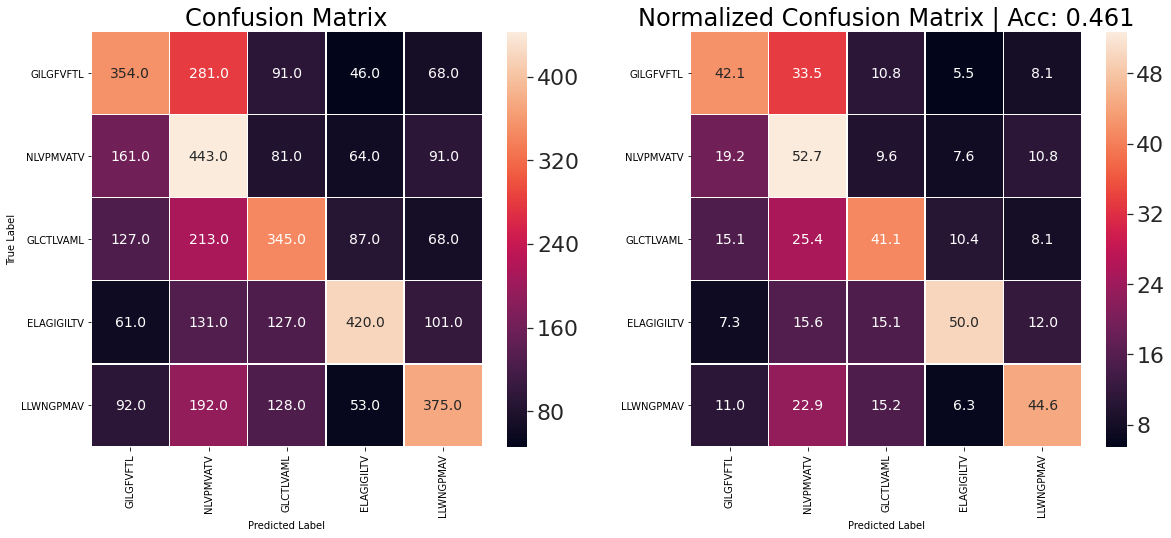

In [8]:
accuracy = utils_metrics.assess_task1(data_dict, network_dict)

In [9]:
auc_dict = utils_metrics.assess_task2(data_dict, network_dict)

In [11]:
auc_dict

{'GILGFVFTL': 0.7498586904761904,
 'NLVPMVATV': 0.7225805357142857,
 'GLCTLVAML': 0.654269880952381,
 'ELAGIGILTV': 0.772642023809524,
 'LLWNGPMAV': 0.8004417857142857}